In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-social-media-channels/social media influencers-TIKTOK - ---DEC 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - Tiktok sep 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - Youtube sep-2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-instagram june 2022 - june 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-youtube - --nov 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-tiktok - ---nov 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - instagram sep-2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-tiktok june 2022 - june 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - tiktok.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-INSTAGRAM - -DEC 2022.csv
/kaggle/input/top-1000-social-media-channels/so

# **Read the data file**

In [2]:
def show_df(filepath_or_buffer):
    """reads a csv file and displays Dataframe"""
    df = pd.read_csv(filepath_or_buffer)
    return df

Tiktok_sep_2022 = "/kaggle/input/top-1000-social-media-channels/social media influencers - Tiktok sep 2022.csv"
df_t = show_df(Tiktok_sep_2022)
df_t.head()

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
0,1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K
1,2,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K
2,3,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K
3,4,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K
4,5,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K


# **Get overview of the dataframe**

In [3]:
df_t.sample(3)

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
40,41,leith1423,Leithal,1.1M,7.9M,1.3M,3.8K,3.2K
361,362,ladygaga,ladygaga,7.6M,1.9M,247.5K,4.4K,2K
733,734,jomaryee,Jomar Yee,9M,2.3M,226.7K,1.3K,626


In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.no           1000 non-null   int64 
 1   Tiktoker name  1000 non-null   object
 2   Tiktok name    999 non-null    object
 3   Subscribers    1000 non-null   object
 4   Views avg.     1000 non-null   object
 5   Likes avg.     1000 non-null   object
 6   Comments avg.  1000 non-null   object
 7   Shares avg.    1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [5]:
df_t.columns

Index(['S.no', 'Tiktoker name', 'Tiktok name', 'Subscribers', 'Views avg.',
       'Likes avg.', 'Comments avg.', 'Shares avg.'],
      dtype='object')

In [6]:
df_t.describe()

,S.no
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [7]:
df_t.shape

(1000, 8)

In [8]:
df_t.duplicated().sum()

0

# **Data preprocessing**

steps:
1. change data types
2. Change column names

In [9]:
def preprocess(filename = Tiktok_sep_2022):
    """prepares and transforms dataframe"""
    dtype_mapper = {"Tiktoker name": "string",
                    "Tiktok name": "string"}
    
    mapper = {"Tiktoker name" : "tiktoker_name",
                "Tiktok name" : "tiktok_name",
                "Subscribers" : "subscribers",
                "Views avg." : "viewer_avg",
                "Likes avg." : "likes_avg",
                "Comments avg." : "comments_avg",
                "Shares avg." : "shares_avg"}
   
    df = pd.read_csv(filename, dtype = dtype_mapper)
    df = df.rename(columns = mapper)

    return df
    
tt = preprocess()
tt.sample(3)

,S.no,tiktoker_name,tiktok_name,subscribers,viewer_avg,likes_avg,comments_avg,shares_avg
472,473,arigameplays,AriGameplays,23.2M,2.8M,320.7K,1.4K,867
657,658,luara,Luara,22.6M,2.7M,185.9K,1.9K,403
188,189,leanadeeb,Leana Deeb,10.4M,3.9M,573.5K,1.3K,2.1K


# **Data processing**

step:
1. Modify the columns where there are int and srt mixing altogether.

In [10]:
def convert_shorthand(value):
    """
    Converts shorthand social media metrics like '2.3M' or '3.5K' to float values.
    """
    if isinstance(value, str):
        value = value.strip().upper().replace(',', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            return float(value)
    return value

cols_to_clean = ["subscribers", "viewer_avg", "likes_avg", "comments_avg", "shares_avg"]
for col in cols_to_clean:
    tt[col] = tt[col].apply(convert_shorthand)

tt.sample(3)

,S.no,tiktoker_name,tiktok_name,subscribers,viewer_avg,likes_avg,comments_avg,shares_avg
185,186,brentrivera,Brent Rivera,44900000.0,4900000.0,574400.0,2000.0,813.0
188,189,leanadeeb,Leana Deeb,10400000.0,3900000.0,573500.0,1300.0,2100.0
774,775,jakepaul,Jake Paul,16700000.0,1500000.0,156400.0,2300.0,1600.0


Recheck and ensure that the data preprocessing and the data processing were done correctly.

In [11]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S.no           1000 non-null   int64  
 1   tiktoker_name  1000 non-null   string 
 2   tiktok_name    999 non-null    string 
 3   subscribers    1000 non-null   float64
 4   viewer_avg     1000 non-null   float64
 5   likes_avg      1000 non-null   float64
 6   comments_avg   1000 non-null   float64
 7   shares_avg     1000 non-null   float64
dtypes: float64(5), int64(1), string(2)
memory usage: 62.6 KB


In [12]:
tt.describe()

,S.no,subscribers,viewer_avg,likes_avg,comments_avg,shares_avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,7.083611e+06,2.854531e+06,3.524345e+05,2540.129000,3263.483000
std,288.819436,1.160618e+07,2.216005e+06,2.861912e+05,3691.868047,4778.561596
min,1.000000,5.100000e+03,5.038000e+05,1.760000e+04,0.000000,70.000000
25%,250.750000,1.300000e+06,1.600000e+06,1.899000e+05,985.000000,822.500000
50%,500.500000,3.500000e+06,2.200000e+06,2.747000e+05,1600.000000,1800.000000
75%,750.250000,8.100000e+06,3.325000e+06,4.007250e+05,2700.000000,3725.000000
max,1000.000000,1.492000e+08,2.200000e+07,2.700000e+06,53900.000000,55900.000000


# **Analysis 👾**

## 🔢 Basic Analysis

1. Who has the highest number of averaged subscribers, viewers, likes, comments, and shares?

In [13]:
def avg_value(dataframe, column_name, top_n=10):
    """
    Sorts and displays top N tiktokers based on the highest values
    of a specified column, showing only relevant identifying columns.

    Args:
        dataframe (pd.DataFrame): The input DataFrame (e.g., 'tt').
        column_name (str): The name of the column to sort by (e.g., "subscribers", "likes_avg").
        top_n (int, optional): The number of top records to display. Defaults to 10.
    """
    # sort the dataframe
    sorted_df = dataframe.sort_values(by=column_name, ascending=False)
    
    # select only the desired columns
    display_columns = ['S.no', 'tiktoker_name', 'tiktok_name', column_name]
    filtered_and_sliced_df = sorted_df[display_columns].head(top_n)
    
    # prints the results
    print(f"\nTop {top_n} tiktokers by highest number of {column_name.replace('_', ' ')}:") # Added .replace to make output more readable
    print(filtered_and_sliced_df.to_string(index=False))

# Top 10 tiktokers by subscribers
avg_value(tt, "subscribers", top_n=10)

# Top 5 tiktokers by average likes
avg_value(tt, "likes_avg", top_n=5)

# Top 3 tiktokers by average comments
avg_value(tt, "comments_avg", top_n=3)


Top 10 tiktokers by highest number of subscribers:
 S.no   tiktoker_name     tiktok_name  subscribers
    2      khaby.lame    Khabane lame  149200000.0
   11   charlidamelio charli d’amelio  146200000.0
   75     bellapoarch    Bella Poarch   91400000.0
    4       addisonre     Addison Rae   88700000.0
   20 kimberly.loaiza Kimberly Loaiza   67200000.0
  327        cznburak        cznburak   63600000.0
   17        domelipa        domelipa   58100000.0
  631    dixiedamelio           dixie   57400000.0
    7         therock        The Rock   55400000.0
  498       lorengray      Loren Gray   54600000.0

Top 5 tiktokers by highest number of likes avg:
 S.no tiktoker_name  tiktok_name  likes_avg
    8      bizarrap         bzrp  2700000.0
    1 jypestraykids   Stray Kids  2300000.0
    2    khaby.lame Khabane lame  2300000.0
   13    jetbentlee          Jet  2200000.0
    6   onwardwanna       Wanna🥊  2000000.0

Top 3 tiktokers by highest number of comments avg:
 S.no  tiktoker_name t

**2. Average engagement rate for micro and macro tiktokers**

note: Macro tiktoker are ones who have 1M subscribers or more, and micro tiktoker have less than 1M subscribers.

In [14]:
tt["engagement_rate"] = (
    (tt["likes_avg"] + tt["comments_avg"] + tt["shares_avg"]) / tt["viewer_avg"]
).round(3)

tt["influencer_type"] = np.where(tt["subscribers"] < 1_000_000, "Micro", "Macro")
tt.groupby("influencer_type")["engagement_rate"].mean()


influencer_type
Macro    0.135692
Micro    0.139182
Name: engagement_rate, dtype: float64

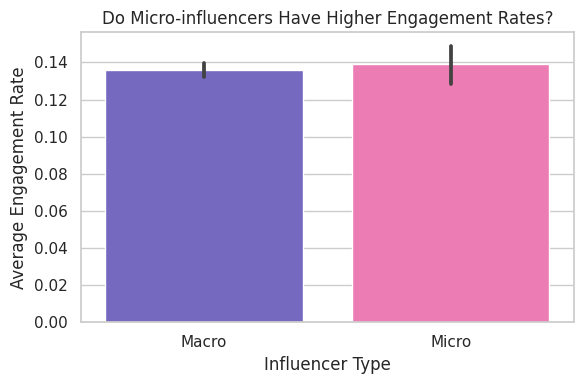

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.barplot(data=tt, x="influencer_type", y="engagement_rate", estimator=np.mean, palette=["#6a5acd", "#ff69b4"])

plt.title("Do Micro-influencers Have Higher Engagement Rates?")
plt.ylabel("Average Engagement Rate")
plt.xlabel("Influencer Type")
plt.tight_layout()
plt.show()

<Axes: xlabel='influencer_type', ylabel='engagement_rate'>

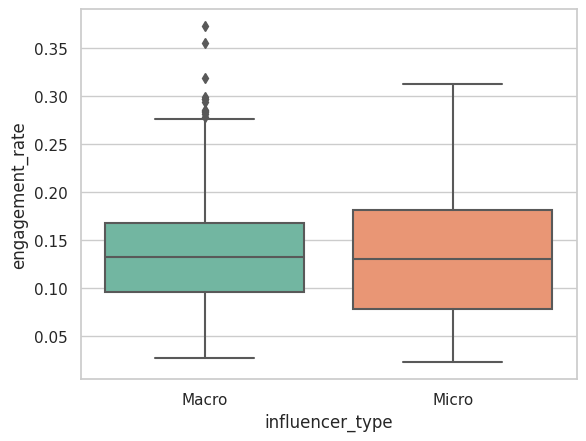

In [16]:
# A box plot to see the spread of the data
sns.boxplot(data=tt, x="influencer_type", y="engagement_rate", palette="Set2")

## Why this question?

- Whether micro-influencers consistently outperform macros on engagement
- If macros are big in size, but small in fan connection
- Where to focus your brand's for maximum ROI

## 📈 Ratios / Efficiency

**1. Engagement rate = (likes + comments + shares) / views**

In [17]:
def compute_ratio(df, metric_name, numerator_cols, denominator_col, sort=False):
    """
    Computes a custom ratio (like engagement rate) for influencers.

    Parameters:
    - df (pd.DataFrame): Your influencer DataFrame
    - metric_name (str): Name of the new metric column (e.g. 'engagement_rate')
    - numerator_cols (list of str): Columns to sum up for the numerator
    - denominator_col (str): Column to use as the denominator

    Returns:
    - pd.DataFrame with ['S.no', 'Tiktoker name', 'Tiktok name', metric_name]
    - sorted by the metric_name col descendingly
    """

    df_copy = tt.copy()
    # Replace NaN with 0 to avoid errors in case of missing values
    df_copy[metric_name] = df_copy[numerator_cols].fillna(0).sum(axis=1) / df_copy[denominator_col].replace(0, np.nan)

    # Round the result
    df_copy[metric_name] = df_copy[metric_name].round(4)

    if sort:
        result = df_copy.sort_values(metric_name, ascending=False)

    return df_copy[['S.no', 'tiktoker_name', 'tiktok_name', metric_name]]


In [18]:
engagement_df = compute_ratio(tt, "engagement_rate", ["likes_avg", "comments_avg", "shares_avg"], "viewer_avg", sort = True)
print(engagement_df.head(10))

   S.no   tiktoker_name    tiktok_name  engagement_rate
0     1   jypestraykids     Stray Kids           0.3726
1     2      khaby.lame   Khabane lame           0.1343
2     3  scarlettsspam2       scarlett           0.0506
3     4       addisonre    Addison Rae           0.0427
4     5      belindatok        Belinda           0.1077
5     6     onwardwanna         Wanna🥊           0.1687
6     7         therock       The Rock           0.1165
7     8        bizarrap           bzrp           0.1674
8     9   landonbarkerr  Landon Barker           0.1055
9    10         mrbeast        MrBeast           0.1323


**2. Like ratio = likes / views**

In [19]:
like_df = compute_ratio(tt, "like_ratio", ["likes_avg"], "viewer_avg", sort = True)
print(like_df.head(10))

   S.no   tiktoker_name    tiktok_name  like_ratio
0     1   jypestraykids     Stray Kids      0.3594
1     2      khaby.lame   Khabane lame      0.1329
2     3  scarlettsspam2       scarlett      0.0473
3     4       addisonre    Addison Rae      0.0412
4     5      belindatok        Belinda      0.1056
5     6     onwardwanna         Wanna🥊      0.1667
6     7         therock       The Rock      0.1145
7     8        bizarrap           bzrp      0.1667
8     9   landonbarkerr  Landon Barker      0.1026
9    10         mrbeast        MrBeast      0.1308


**3. Comment-to-view ratio = comments / views**

In [20]:
c_to_v = compute_ratio(tt, "Comment-to-view ratio", ["comments_avg"], "viewer_avg", sort = True)
print(c_to_v.head(10))

   S.no   tiktoker_name    tiktok_name  Comment-to-view ratio
0     1   jypestraykids     Stray Kids                 0.0078
1     2      khaby.lame   Khabane lame                 0.0009
2     3  scarlettsspam2       scarlett                 0.0030
3     4       addisonre    Addison Rae                 0.0003
4     5      belindatok        Belinda                 0.0010
5     6     onwardwanna         Wanna🥊                 0.0017
6     7         therock       The Rock                 0.0011
7     8        bizarrap           bzrp                 0.0003
8     9   landonbarkerr  Landon Barker                 0.0016
9    10         mrbeast        MrBeast                 0.0013


# Visualisation 👁️

## 1. Bar plot: top 10 influencers by subscribers

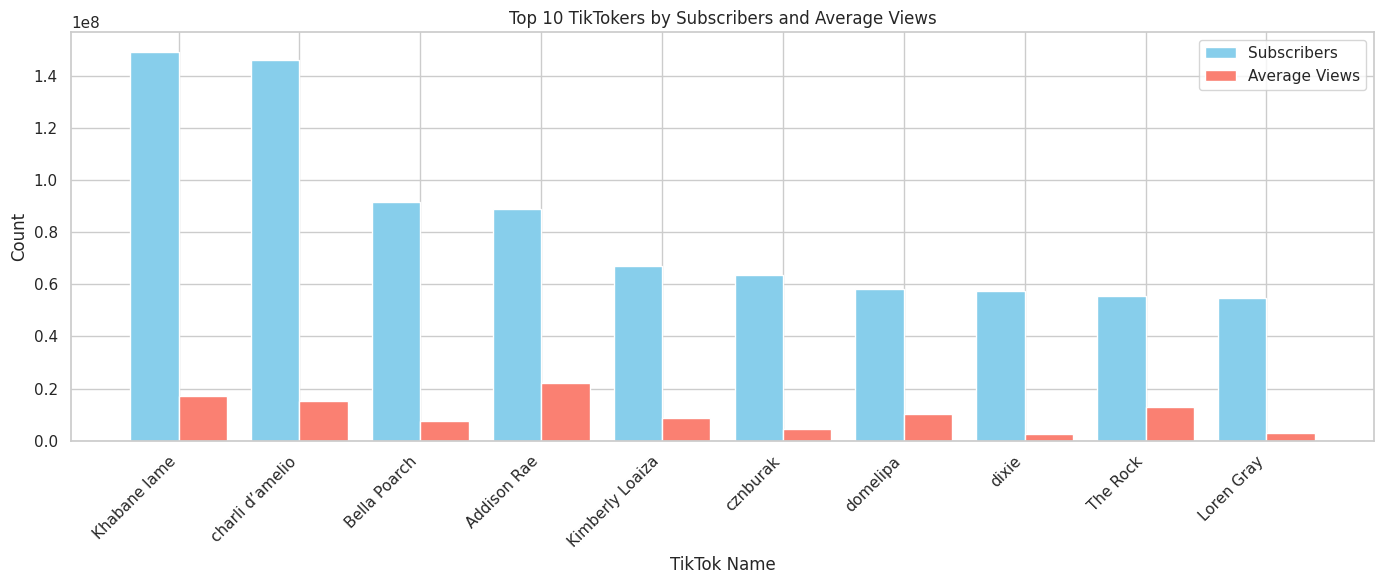

In [21]:
# Step 1: Get top 10 TikTokers by subscriber count
top_10 = tt.sort_values("subscribers", ascending=False).head(10)

# X-axis setup
x = np.arange(len(top_10))
width = 0.4

plt.figure(figsize=(14, 6))

plt.bar(x - width/2, top_10["subscribers"], width, label="Subscribers", color="skyblue")
plt.bar(x + width/2, top_10["viewer_avg"], width, label="Average Views", color="salmon")

plt.xlabel("TikTok Name")
plt.ylabel("Count")
plt.title("Top 10 TikTokers by Subscribers and Average Views")
plt.xticks(x, top_10["tiktok_name"], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


## Scatter plot

In [22]:
# a new column
tt["engagement_rate"] = (
    (tt["likes_avg"] + tt["comments_avg"] + tt["shares_avg"]) / tt["viewer_avg"]
).round(3)


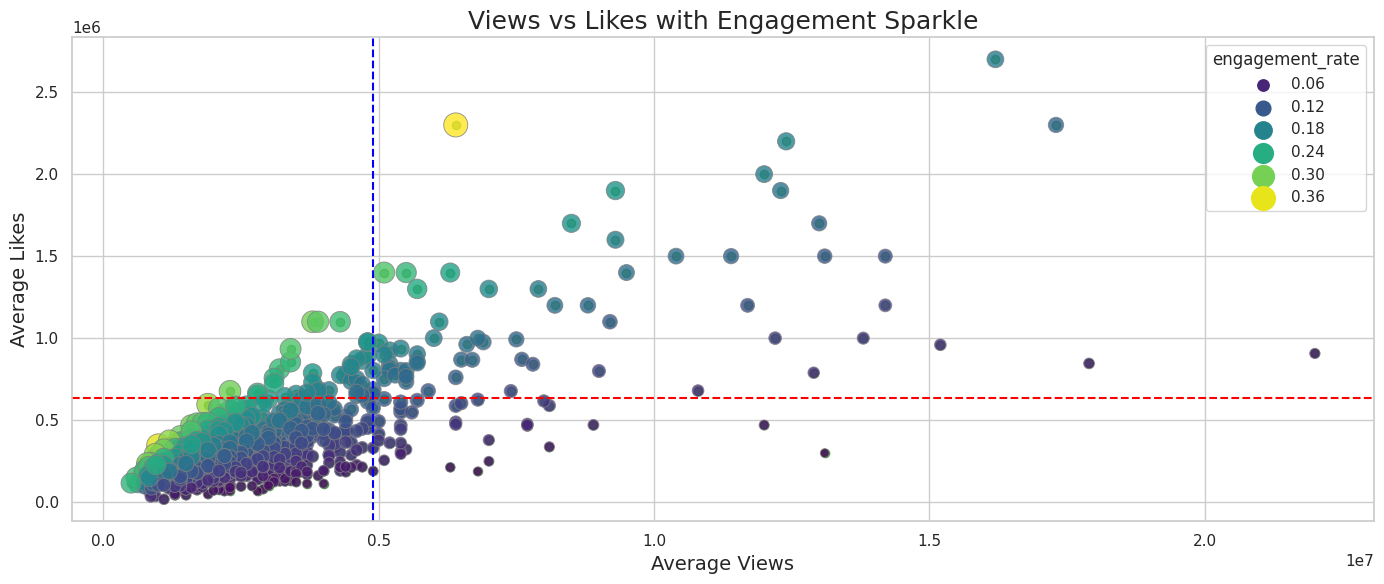

In [23]:
sns.set(style="whitegrid")

# define thresholds for highlighting
likes_threshold = tt["likes_avg"].quantile(0.90)
views_threshold = tt["viewer_avg"].quantile(0.90)

plt.figure(figsize=(14, 6))

# Scatter plot using the actual data columns
plt.scatter(tt["viewer_avg"], tt["likes_avg"], color='green', alpha=0.6)

scatter = sns.scatterplot(
    data=tt,
    x="viewer_avg",
    y="likes_avg",
    hue="engagement_rate",
    palette="viridis",
    size="engagement_rate",
    sizes=(40, 300),
    legend="brief",
    edgecolor='gray',
    alpha=0.8
)


# Add threshold lines
plt.axhline(y=likes_threshold, color='red', linestyle='--', label=f'90% Likes Threshold ({likes_threshold:.0f})')
plt.axvline(x=views_threshold, color='blue', linestyle='--', label=f'90% Views Threshold ({views_threshold:.0f})')

# Labels and title
plt.xlabel("Average Views", fontsize=14)
plt.ylabel("Average Likes", fontsize=14)
plt.grid(True)
plt.title("Views vs Likes with Engagement Sparkle", fontsize=18)
plt.xlabel("Average Views", fontsize=14)
plt.ylabel("Average Likes", fontsize=14)
plt.tight_layout()
plt.show()

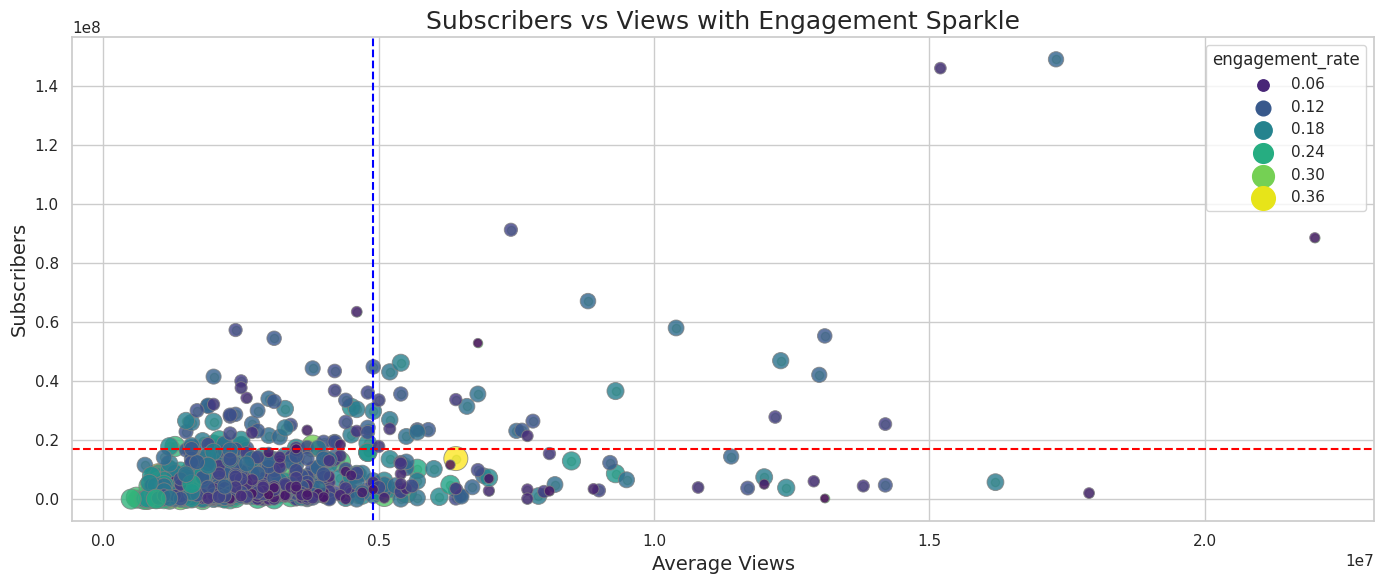

In [24]:
sns.set(style="whitegrid")

# define thresholds for highlighting
subs_threshold = tt["subscribers"].quantile(0.90)
views_threshold = tt["viewer_avg"].quantile(0.90)

plt.figure(figsize=(14, 6))

plt.scatter(tt["viewer_avg"], tt["subscribers"], color='green', alpha=0.3)

# Seaborn scatter plot
scatter = sns.scatterplot(
    data=tt,
    x="viewer_avg",
    y="subscribers",
    hue="engagement_rate",
    palette="viridis",
    size="engagement_rate",
    sizes=(40, 300),
    legend="brief",
    edgecolor='gray',
    alpha=0.8
)

# Add threshold lines
plt.axhline(y=subs_threshold, color='red', linestyle='--', label=f'90% Subscribers Threshold ({subs_threshold:.0f})')
plt.axvline(x=views_threshold, color='blue', linestyle='--', label=f'90% Views Threshold ({views_threshold:.0f})')


plt.xlabel("Average Views", fontsize=14)
plt.ylabel("Subscribers", fontsize=14)
plt.title("Subscribers vs Views with Engagement Sparkle", fontsize=18)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler

# Choose relevant features
features = tt[["likes_avg", "shares_avg", "comments_avg"]].copy()

# Fill missing values if any
features = features.fillna(0)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [26]:
from sklearn.cluster import KMeans

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
tt["engagement_cluster"] = kmeans.fit_predict(scaled_features)

# Map numeric cluster labels to fabulous names
cluster_names = {
    0: "LikeLords",
    1: "ShareStars",
    2: "CommentCrew"
}

tt["engagement_type"] = tt["engagement_cluster"].map(cluster_names)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


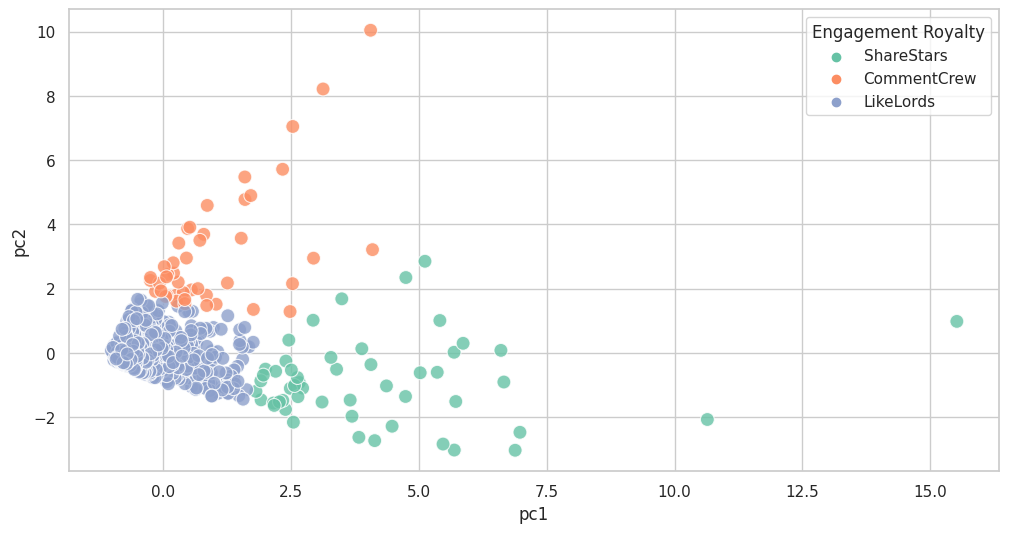

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

tt["pc1"] = components[:, 0]
tt["pc2"] = components[:, 1]

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=tt,
    x="pc1",
    y="pc2",
    hue="engagement_type",
    palette="Set2",
    s=100,
    alpha=0.8
)
plt.legend(title="Engagement Royalty")

In [28]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, tt["engagement_cluster"])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.66
